In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [2]:
life_expectancy = "./life_expectancy_by_state.csv"

In [3]:
life_expectancy_pd = pd.read_csv(life_expectancy)
life_expectancy_pd.head()

,Location,Life Expectancy at Birth (years),Footnotes
0,United States,78.7,NaN
1,Alabama,75.5,NaN
2,Alaska,78.8,NaN
3,Arizona,79.9,NaN
4,Arkansas,76.0,NaN


In [4]:
life_expectancy_pd.rename(columns = {'Location':'State', 'Life Expectancy at Birth (years)':'Longevity'}, inplace = True)

In [5]:
life_expectancy_pd = life_expectancy_pd[life_expectancy_pd.State != 'United States']
life_expectancy_pd.head()

,State,Longevity,Footnotes
1,Alabama,75.5,NaN
2,Alaska,78.8,NaN
3,Arizona,79.9,NaN
4,Arkansas,76.0,NaN
5,California,81.3,NaN


In [6]:
life_expectancy_pd.reset_index(drop=True, inplace=True)
life_expectancy_pd.head()

,State,Longevity,Footnotes
0,Alabama,75.5,NaN
1,Alaska,78.8,NaN
2,Arizona,79.9,NaN
3,Arkansas,76.0,NaN
4,California,81.3,NaN


In [7]:
life_expectancy_pd = life_expectancy_pd.drop('Footnotes', axis=1)
life_expectancy_pd


,State,Longevity
0,Alabama,75.5
1,Alaska,78.8
2,Arizona,79.9
3,Arkansas,76.0
4,California,81.3
...,...,...
56,"Arias E, Escobedo LA, Kennedy J, Fu C, Cisewsk...",NaN
57,NaN,NaN
58,NaN,NaN
59,Footnotes,NaN


In [8]:
nonrows = life_expectancy_pd.iloc[51:61, :]
print(nonrows)

                                                State  Longevity
51                                                NaN        NaN
52                                              Notes        NaN
53  State-level estimates are based on pooled 2011...        NaN
54                                                NaN        NaN
55                                            Sources        NaN
56  Arias E, Escobedo LA, Kennedy J, Fu C, Cisewsk...        NaN
57                                                NaN        NaN
58                                                NaN        NaN
59                                          Footnotes        NaN
60  1. Data for Maine and Wisconsin are not availa...        NaN


In [9]:
life_expectancy_pd = life_expectancy_pd.iloc[0:51, :]
life_expectancy_pd.sort_values(by = 'State')

,State,Longevity
0,Alabama,75.5
1,Alaska,78.8
2,Arizona,79.9
3,Arkansas,76.0
4,California,81.3
5,Colorado,80.5
6,Connecticut,80.9
7,Delaware,78.7
8,District of Columbia,78.5
9,Florida,80.1


In [10]:
life_expectancy_pd.shape

(51, 2)

In [11]:
alcohol = "./alcohol_consumption_by_state.csv"

In [12]:
alcohol_pd = pd.read_csv(alcohol)
alcohol_pd.head()

,State,alcoholConsumptionGallons,alcoholConsumptionLiters,Pop
0,Utah,1.34,5.07,3221610
1,West Virginia,1.76,6.66,1791951
2,Arkansas,1.80,6.81,3026412
3,Oklahoma,1.88,7.12,3948950
4,Kansas,1.92,7.27,2910931


In [13]:
alcohol_pd = alcohol_pd.sort_values(by = 'State')
alcohol_pd = alcohol_pd.reset_index(drop = True)
alcohol_pd

,State,alcoholConsumptionGallons,alcoholConsumptionLiters,Pop
0,Alabama,2.01,7.61,4898246
1,Alaska,2.94,11.13,735720
2,Arizona,2.31,8.74,7275070
3,Arkansas,1.80,6.81,3026412
4,California,2.33,8.82,39747267
5,Colorado,2.81,10.64,5770545
6,Connecticut,2.45,9.27,3567871
7,Delaware,3.72,14.08,975033
8,District of Columbia,3.85,14.57,711571
9,Florida,2.65,10.03,21646155


In [14]:
alcohol_pd.shape

(51, 4)

In [15]:
merged_table = pd.merge(life_expectancy_pd, alcohol_pd, how='outer', on="State", indicator=True)
merged_table = merged_table.dropna() # drop rows with NaN values
merged_table = merged_table.drop(['alcoholConsumptionLiters', 'Pop'], axis = 1)
merged_table
# table data seems to be cleaned now, ready for analysis
# Maine and Wisconsin have no data for life expectancy, we can choose to ignore them or impute the mean/median

,State,Longevity,alcoholConsumptionGallons,_merge
0,Alabama,75.5,2.01,both
1,Alaska,78.8,2.94,both
2,Arizona,79.9,2.31,both
3,Arkansas,76.0,1.80,both
4,California,81.3,2.33,both
5,Colorado,80.5,2.81,both
6,Connecticut,80.9,2.45,both
7,Delaware,78.7,3.72,both
8,District of Columbia,78.5,3.85,both
9,Florida,80.1,2.65,both


In [16]:

merged_table.shape

(49, 4)

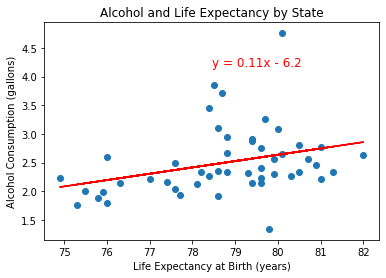

In [17]:
def scatterPlotAndLine(x, y, title, y_label, x_label): # defining a function to allow code re-use
    stats = linregress(x, y)

    m = stats.slope
    b = stats.intercept
    y_intercept_sign = "+" if b >= 0 else "-"
    line_eq = "y = " + str(round(stats.slope, 2)) + "x " + y_intercept_sign + " " + str(abs(round(stats.intercept, 2)))

    plt.scatter(x, y)
    plt.plot(x, m * x + b, color="red")
    
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.annotate(line_eq, fontsize=12, color="red", xy=(0.5, 0.8), xycoords='axes fraction')
    
scatterPlotAndLine(x=merged_table.Longevity, y=merged_table.alcoholConsumptionGallons, 
                   title="Alcohol and Life Expectancy by State", y_label="Alcohol Consumption (gallons)", 
                   x_label="Life Expectancy at Birth (years)")


In [18]:
def computeModelSummary(x, y):
    # Note the difference in argument order
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) # make the predictions by the model

    # Print out the statistics
    return model.summary()

computeModelSummary(x=merged_table.Longevity, y=merged_table.alcoholConsumptionGallons)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     alcoholConsumptionGallons   R-squared (uncentered):                   0.951
Model:                                   OLS   Adj. R-squared (uncentered):              0.950
Method:                        Least Squares   F-statistic:                              922.6
Date:                       Sat, 11 Jan 2020   Prob (F-statistic):                    5.38e-33
Time:                               12:47:02   Log-Likelihood:                         -42.070
No. Observations:                         49   AIC:                                      86.14
Df Residuals:                             48   BIC:                                      88.03
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Longevity      0.0318      0.001     30.374      0.000       0.030       0.034
==============================================================================
Omnibus:                       24.810   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.723
Skew:                           1.527   Prob(JB):                     1.94e-10
Kurtosis:                       6.547   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
obesity = "./obesity_by_state.csv"
obesity = pd.read_csv(obesity)
obesity.head()

,State,obesityRank,obesityPercentage,Pop
0,West Virginia,1,0.381,1791951
1,Mississippi,2,0.373,2987895
2,Oklahoma,3,0.365,3948950
3,Iowa,4,0.364,3167997
4,Alabama,5,0.363,4898246


In [20]:
obesity = obesity.sort_values(by = 'State')
obesity = obesity.drop(['obesityRank', 'Pop'], axis = 1)
obesity.reset_index(drop=True, inplace=True)
obesity["obesityPercentage"] = obesity["obesityPercentage"].map(lambda x: 100*x) 
obesity.head()

,State,obesityPercentage
0,Alabama,36.3
1,Alaska,34.2
2,Arizona,29.5
3,Arkansas,35.0
4,California,25.1


In [21]:
obesity.shape

(50, 2)

In [22]:
merged_obesity_table = pd.merge(life_expectancy_pd, obesity, how='outer', on='State', indicator=True)
merged_obesity_table = merged_obesity_table.dropna() # drop rows with NaN values
merged_obesity_table

,State,Longevity,obesityPercentage,_merge
0,Alabama,75.5,36.3,both
1,Alaska,78.8,34.2,both
2,Arizona,79.9,29.5,both
3,Arkansas,76.0,35.0,both
4,California,81.3,25.1,both
5,Colorado,80.5,22.6,both
6,Connecticut,80.9,26.9,both
7,Delaware,78.7,31.8,both
9,Florida,80.1,28.4,both
10,Georgia,77.7,31.6,both


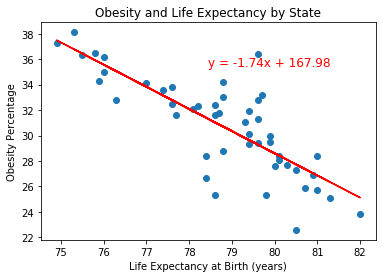

In [23]:
scatterPlotAndLine(x=merged_obesity_table.Longevity, y=merged_obesity_table.obesityPercentage, 
                   title="Obesity and Life Expectancy by State", y_label="Obesity Percentage", 
                   x_label="Life Expectancy at Birth (years)")


In [24]:
computeModelSummary(x=merged_obesity_table.Longevity, y=merged_obesity_table.obesityPercentage)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      obesityPercentage   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2373.
Date:                Sat, 11 Jan 2020   Prob (F-statistic):                    6.97e-42
Time:                        12:47:06   Log-Likelihood:                         -138.33
No. Observations:                  48   AIC:                                      278.7
Df Residuals:                      47   BIC:                                      280.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Longevity      0.3895      0.008     48.711      0.000       0.373       0.406
==============================================================================
Omnibus:                        1.590   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.112
Skew:                           0.006   Prob(JB):                        0.574
Kurtosis:                       2.255   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
cigarette = "./current_cigarette_use.csv" #renamed cigarette file

In [26]:
cigarette_pd = pd.read_csv(cigarette)
cigarette_pd.head()

,Location Desc,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,$$hashKey,$$stateabbreviation,$$statename,$$stateId,timeIntervalDataVal,$$color,textoffsety,type,textoffsetx
0,Alabama,20.9,19.5,22.3,"6,472",object:188,al,Alabama,1,0,class5_color4,NaN,NaN,NaN
1,Alaska,21.0,18.3,23.7,"3,084",object:189,ak,Alaska,2,0,class5_color4,NaN,NaN,NaN
2,Arizona,15.6,14.8,16.4,"14,770",object:190,az,Arizona,4,0,class5_color2,NaN,NaN,NaN
3,Arkansas,22.3,20.0,24.6,"5,100",object:191,ar,Arkansas,5,0,class5_color4,3.0,NaN,NaN
4,California,11.3,10.3,12.3,"8,717",object:192,ca,California,6,0,class5_color1,10.0,NaN,NaN


In [27]:
#rename columns
cigarette_pd.rename(columns = {'Location Desc':'State', 
                               'Data Value':'cigarettePercent'}, inplace = True)

In [28]:
#sort and remove extra columns
cigarette_pd = cigarette_pd.sort_values(by = 'State')
cigarette_pd = cigarette_pd.drop(['Low Confidence Limit', 'High Confidence Limit', 'Sample Size', '$$hashKey', 
                                  '$$stateabbreviation','$$statename', '$$stateId', 'timeIntervalDataVal',
                                 '$$color', 'textoffsety', 'type', 'textoffsetx' ], axis = 1)
print(cigarette_pd)

                   State  cigarettePercent
0                Alabama              20.9
1                 Alaska              21.0
2                Arizona              15.6
3               Arkansas              22.3
4             California              11.3
5               Colorado              14.6
6            Connecticut              12.7
7               Delaware              17.0
8   District of Columbia              14.3
9                Florida              16.1
10               Georgia              17.5
11                  Guam              26.4
12                Hawaii              12.8
13                 Idaho              14.3
14              Illinois              15.5
15               Indiana              21.8
16                  Iowa              17.1
17                Kansas              17.4
18              Kentucky              24.6
19             Louisiana              23.1
20                 Maine              17.3
21              Maryland              13.8
22         

In [29]:
cigarette_pd.shape 

(53, 2)

In [30]:
merged_cigarette_table = pd.merge(life_expectancy_pd, cigarette_pd, how='outer', on='State', indicator=True)
merged_cigarette_table

,State,Longevity,cigarettePercent,_merge
0,Alabama,75.5,20.9,both
1,Alaska,78.8,21.0,both
2,Arizona,79.9,15.6,both
3,Arkansas,76.0,22.3,both
4,California,81.3,11.3,both
5,Colorado,80.5,14.6,both
6,Connecticut,80.9,12.7,both
7,Delaware,78.7,17.0,both
8,District of Columbia,78.5,14.3,both
9,Florida,80.1,16.1,both


In [31]:
merged_cigarette_table = merged_cigarette_table.dropna() # drop rows with NaN values
merged_cigarette_table

,State,Longevity,cigarettePercent,_merge
0,Alabama,75.5,20.9,both
1,Alaska,78.8,21.0,both
2,Arizona,79.9,15.6,both
3,Arkansas,76.0,22.3,both
4,California,81.3,11.3,both
5,Colorado,80.5,14.6,both
6,Connecticut,80.9,12.7,both
7,Delaware,78.7,17.0,both
8,District of Columbia,78.5,14.3,both
9,Florida,80.1,16.1,both


In [32]:
merged_cigarette_table.shape #check number of rows and columns

(49, 4)

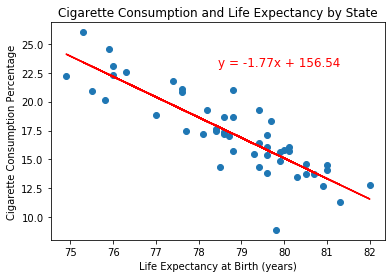

In [33]:
scatterPlotAndLine(x=merged_cigarette_table.Longevity, y=merged_cigarette_table.cigarettePercent, 
                   title="Cigarette Consumption and Life Expectancy by State", y_label="Cigarette Consumption Percentage", 
                   x_label="Life Expectancy at Birth (years)")

In [34]:
computeModelSummary(x=merged_cigarette_table.Longevity, y=merged_cigarette_table.cigarettePercent)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       cigarettePercent   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              962.4
Date:                Sat, 11 Jan 2020   Prob (F-statistic):                    2.05e-33
Time:                        12:47:13   Log-Likelihood:                         -135.55
No. Observations:                  49   AIC:                                      273.1
Df Residuals:                      48   BIC:                                      275.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Longevity      0.2187      0.007     31.023      0.000       0.205       0.233
==============================================================================
Omnibus:                        1.097   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.073
Skew:                           0.332   Prob(JB):                        0.585
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
nutrition = "./nutrition.csv"
nutrition = pd.read_csv(nutrition)
nutrition.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
1,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Gender,Female,GEN,FEMALE
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824


In [36]:
nutrition.columns # see what columns the table has

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [37]:
# remove columns we don't need
nutrition = nutrition.drop(columns=['LocationAbbr', 'Total', 'StratificationID1',
                           'Datasource', 'Topic', 'Data_Value_Unit', 'Data_Value_Type',
                           'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 
                           'Data_Value_Footnote', 'Low_Confidence_Limit',
                           'Age(years)', 'Education', 'Gender', 'Income',
                           'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
                           'QuestionID', 'DataValueTypeID', 'LocationID',
                           'StratificationCategory1', 'Stratification1',
                           'StratificationCategoryId1', 'High_Confidence_Limit ', 'YearStart'])
nutrition.head()

,YearEnd,LocationDesc,Class,Question,Data_Value,Sample_Size
0,2012,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,48.5,69.0
1,2012,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.6,243.0
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.2,598.0
3,2013,National,Physical Activity,Percent of adults who engage in no leisure-tim...,27.9,266452.0
4,2011,National,Physical Activity,Percent of adults who engage in no leisure-tim...,16.9,20923.0


In [38]:
print(nutrition.LocationDesc.unique()) # see locations to remove non-states
nutrition = nutrition[nutrition.LocationDesc != 'US']
nutrition = nutrition[nutrition.LocationDesc != 'Guam']
nutrition = nutrition[nutrition.LocationDesc != 'Puerto Rico']
nutrition = nutrition[nutrition.LocationDesc != 'Virgin Islands']
nutrition = nutrition[nutrition.LocationDesc != 'National']
len(nutrition.LocationDesc.unique())

['Wyoming' 'District of Columbia' 'Alabama' 'National' 'Rhode Island'
 'Minnesota' 'Washington' 'Georgia' 'Wisconsin' 'Delaware' 'New Jersey'
 'North Carolina' 'Pennsylvania' 'Oklahoma' 'Michigan' 'Vermont'
 'Massachusetts' 'California' 'Utah' 'North Dakota' 'Tennessee' 'Colorado'
 'New York' 'Florida' 'Montana' 'Kansas' 'New Hampshire' 'Virginia'
 'Louisiana' 'Oregon' 'Maine' 'Alaska' 'Iowa' 'Indiana' 'South Dakota'
 'Connecticut' 'Guam' 'Illinois' 'Maryland' 'Hawaii' 'New Mexico'
 'Arizona' 'Arkansas' 'West Virginia' 'Mississippi' 'Missouri' 'Nebraska'
 'Texas' 'South Carolina' 'Kentucky' 'Nevada' 'Ohio' 'Idaho' 'Puerto Rico'
 'Virgin Islands']


51

In [39]:
nutrition = nutrition.dropna() # drop NaN values

In [40]:
nutrition.Class.unique() # see unique classes

array(['Obesity / Weight Status', 'Physical Activity',
       'Fruits and Vegetables'], dtype=object)

In [41]:
nutrition_physical = nutrition[nutrition.Class == 'Physical Activity'] # isolate by 'Physical Activity' class
nutrition_physical.head()

,YearEnd,LocationDesc,Class,Question,Data_Value,Sample_Size
8,2012,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,32.3,484.0
9,2013,Minnesota,Physical Activity,Percent of adults who achieve at least 150 min...,52.8,3680.0
12,2015,Wisconsin,Physical Activity,Percent of adults who achieve at least 150 min...,19.1,412.0
13,2011,Delaware,Physical Activity,Percent of adults who engage in no leisure-tim...,24.4,707.0
14,2015,New Jersey,Physical Activity,Percent of adults who achieve at least 150 min...,37.6,566.0


In [42]:
print(nutrition_physical.YearEnd.unique()) # print list of years
nutrition_physical = nutrition_physical[nutrition_physical.YearEnd == 2018] # only consider latest year (2018)
nutrition_physical = nutrition_physical.rename(columns = {'LocationDesc':'State'})



nutrition_physical

[2012 2013 2015 2011 2014 2016 2018 2017]


,YearEnd,State,Class,Question,Data_Value,Sample_Size
727,2018,California,Physical Activity,Percent of adults who engage in no leisure-tim...,19.5,6099.0
5400,2018,Indiana,Physical Activity,Percent of adults who engage in no leisure-tim...,30.4,4355.0
6826,2018,Louisiana,Physical Activity,Percent of adults who engage in no leisure-tim...,24.4,545.0
8012,2018,Maryland,Physical Activity,Percent of adults who engage in no leisure-tim...,24.6,120.0
8013,2018,New Jersey,Physical Activity,Percent of adults who engage in no leisure-tim...,30.8,1601.0
...,...,...,...,...,...,...
14025,2018,New Hampshire,Physical Activity,Percent of adults who engage in no leisure-tim...,28.3,1022.0
14030,2018,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,29.4,4450.0
14034,2018,North Dakota,Physical Activity,Percent of adults who engage in no leisure-tim...,26.6,707.0
14035,2018,Wisconsin,Physical Activity,Percent of adults who engage in no leisure-tim...,33.7,626.0


In [43]:
# Lets calculate a weighted average because the data_values for a state are for different sample sizes

# Weighted average function
def wavg(group, data_value_col, sample_size_col):
    data_values = group[data_value_col]
    sample_sizes = group[sample_size_col]
    return (data_values * sample_sizes).sum() / sample_sizes.sum()


# Calculate weighted average for physical activity
physical_wa_by_state = nutrition_physical.groupby("State").apply(wavg, "Data_Value", "Sample_Size")


# Convert series to dataframe
physical_wa_df = pd.DataFrame({'State':physical_wa_by_state.index, 
                               'infrequentPhysicalActivityPercent':physical_wa_by_state.values})
physical_wa_df = physical_wa_df.round(2) # round to 2 decimal places
physical_wa_df

,State,infrequentPhysicalActivityPercent
0,Alabama,30.88
1,Alaska,19.67
2,Arizona,22.33
3,Arkansas,31.72
4,California,20.78
5,Colorado,16.34
6,Connecticut,22.06
7,Delaware,27.09
8,District of Columbia,19.60
9,Florida,26.74


In [44]:
# Convert the inverted percent (people who don't exercise frequently) to the regular percent (people who do exercise frequently)
physical_wa_df.rename(columns = {'infrequentPhysicalActivityPercent':'physicalActivityPercent'}, inplace = True)
physical_wa_df['physicalActivityPercent'] = physical_wa_df['physicalActivityPercent'].map(lambda x: 100-x)
physical_wa_df

,State,physicalActivityPercent
0,Alabama,69.12
1,Alaska,80.33
2,Arizona,77.67
3,Arkansas,68.28
4,California,79.22
5,Colorado,83.66
6,Connecticut,77.94
7,Delaware,72.91
8,District of Columbia,80.40
9,Florida,73.26


In [45]:
nutrition_fruits = nutrition[nutrition.Class == 'Fruits and Vegetables'] # isolate by 'Fruits and Vegetables' class
nutrition_fruits.head()

,YearEnd,LocationDesc,Class,Question,Data_Value,Sample_Size
7054,2017,Maine,Fruits and Vegetables,Percent of adults who report consuming vegetab...,11.7,2280.0
7114,2017,Missouri,Fruits and Vegetables,Percent of adults who report consuming fruit l...,43.4,2986.0
7232,2017,Massachusetts,Fruits and Vegetables,Percent of adults who report consuming fruit l...,29.9,452.0
7350,2017,Michigan,Fruits and Vegetables,Percent of adults who report consuming vegetab...,17.5,1585.0
7489,2017,Missouri,Fruits and Vegetables,Percent of adults who report consuming fruit l...,40.4,5906.0


In [46]:
print(nutrition_fruits.YearEnd.unique()) # print list of years
nutrition_fruits = nutrition_fruits[nutrition_fruits.YearEnd == 2017] # only consider latest year (2017)
nutrition_fruits = nutrition_fruits.rename(columns = {'LocationDesc':'State'})
nutrition_fruits.head()

[2017]


,YearEnd,State,Class,Question,Data_Value,Sample_Size
7054,2017,Maine,Fruits and Vegetables,Percent of adults who report consuming vegetab...,11.7,2280.0
7114,2017,Missouri,Fruits and Vegetables,Percent of adults who report consuming fruit l...,43.4,2986.0
7232,2017,Massachusetts,Fruits and Vegetables,Percent of adults who report consuming fruit l...,29.9,452.0
7350,2017,Michigan,Fruits and Vegetables,Percent of adults who report consuming vegetab...,17.5,1585.0
7489,2017,Missouri,Fruits and Vegetables,Percent of adults who report consuming fruit l...,40.4,5906.0


In [47]:
# Calculate weighted average for fruits and vegetables
fruits_wa_by_state = nutrition_fruits.groupby("State").apply(wavg, "Data_Value", "Sample_Size")


# Convert series to dataframe
fruits_wa_df = pd.DataFrame({'State':fruits_wa_by_state.index, 'infrequentFruitsVegetablesConsumptionPercent':fruits_wa_by_state.values})
fruits_wa_df = fruits_wa_df.round(2) # round to 2 decimal places
fruits_wa_df

,State,infrequentFruitsVegetablesConsumptionPercent
0,Alabama,32.02
1,Alaska,27.54
2,Arizona,28.40
3,Arkansas,31.77
4,California,26.47
5,Colorado,24.72
6,Connecticut,23.57
7,Delaware,26.19
8,District of Columbia,22.42
9,Florida,26.69


In [48]:
# Convert the inverted percent (people who don't consume fruits frequently) to the regular percent (people who do consume fruits frequently)
fruits_wa_df.rename(columns = {'infrequentFruitsVegetablesConsumptionPercent':'fruitsVegetablesConsumptionPercent'}, inplace = True)
fruits_wa_df['fruitsVegetablesConsumptionPercent'] = fruits_wa_df['fruitsVegetablesConsumptionPercent'].map(lambda x: 100-x)
fruits_wa_df

,State,fruitsVegetablesConsumptionPercent
0,Alabama,67.98
1,Alaska,72.46
2,Arizona,71.60
3,Arkansas,68.23
4,California,73.53
5,Colorado,75.28
6,Connecticut,76.43
7,Delaware,73.81
8,District of Columbia,77.58
9,Florida,73.31


In [49]:
merged_physical_table = pd.merge(life_expectancy_pd, physical_wa_df, how='outer', on='State', indicator=True)
merged_physical_table = merged_physical_table.dropna() # drop rows with NaN values
merged_physical_table

,State,Longevity,physicalActivityPercent,_merge
0,Alabama,75.5,69.12,both
1,Alaska,78.8,80.33,both
2,Arizona,79.9,77.67,both
3,Arkansas,76.0,68.28,both
4,California,81.3,79.22,both
5,Colorado,80.5,83.66,both
6,Connecticut,80.9,77.94,both
7,Delaware,78.7,72.91,both
8,District of Columbia,78.5,80.40,both
9,Florida,80.1,73.26,both


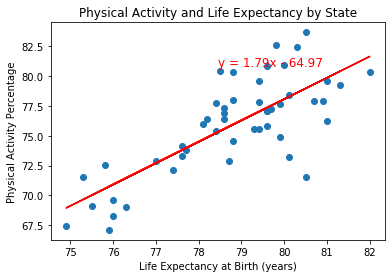

In [50]:
scatterPlotAndLine(x=merged_physical_table.Longevity, y=merged_physical_table.physicalActivityPercent, 
                   title="Physical Activity and Life Expectancy by State", y_label="Physical Activity Percentage", 
                   x_label="Life Expectancy at Birth (years)")

In [51]:
computeModelSummary(x=merged_physical_table.Longevity, y=merged_physical_table.physicalActivityPercent)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     physicalActivityPercent   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          3.245e+04
Date:                     Sat, 11 Jan 2020   Prob (F-statistic):                    1.33e-69
Time:                             12:47:27   Log-Likelihood:                         -122.02
No. Observations:                       49   AIC:                                      246.0
Df Residuals:                           48   BIC:                                      247.9
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Longevity      0.9635      0.005    180.151      0.000       0.953       0.974
==============================================================================
Omnibus:                        0.030   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.212
Skew:                           0.005   Prob(JB):                        0.900
Kurtosis:                       2.678   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
merged_fruits_table = pd.merge(life_expectancy_pd, fruits_wa_df, how='outer', on='State', indicator=True)
merged_fruits_table = merged_fruits_table.dropna() # drop rows with NaN values
merged_fruits_table

,State,Longevity,fruitsVegetablesConsumptionPercent,_merge
0,Alabama,75.5,67.98,both
1,Alaska,78.8,72.46,both
2,Arizona,79.9,71.60,both
3,Arkansas,76.0,68.23,both
4,California,81.3,73.53,both
5,Colorado,80.5,75.28,both
6,Connecticut,80.9,76.43,both
7,Delaware,78.7,73.81,both
8,District of Columbia,78.5,77.58,both
9,Florida,80.1,73.31,both


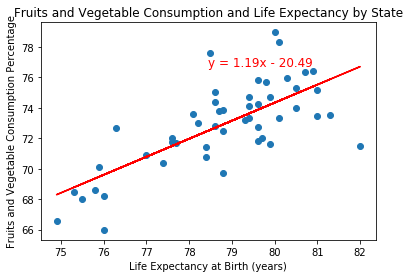

In [53]:
scatterPlotAndLine(x=merged_fruits_table.Longevity, y=merged_fruits_table.fruitsVegetablesConsumptionPercent, 
                   title="Fruits and Vegetable Consumption and Life Expectancy by State", y_label="Fruits and Vegetable Consumption Percentage", 
                   x_label="Life Expectancy at Birth (years)")

In [54]:
computeModelSummary(x=merged_fruits_table.Longevity, y=merged_fruits_table.fruitsVegetablesConsumptionPercent)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     fruitsVegetablesConsumptionPercent   R-squared (uncentered):                   0.999
Model:                                            OLS   Adj. R-squared (uncentered):              0.999
Method:                                 Least Squares   F-statistic:                          6.409e+04
Date:                                Sat, 11 Jan 2020   Prob (F-statistic):                    1.09e-76
Time:                                        12:47:29   Log-Likelihood:                         -103.36
No. Observations:                                  49   AIC:                                      208.7
Df Residuals:                                      48   BIC:                                      210.6
Df Model:                                           1                                                  
Covariance Type:                            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Longevity      0.9253      0.004    253.154      0.000       0.918       0.933
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                0.900
Skew:                           0.273   Prob(JB):                        0.638
Kurtosis:                       3.377   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""